In [1]:
import numpy as np
import pandas as pd

In [2]:
transaction_list1 = pd.read_csv("/content/i1.csv")
transaction_list2 = pd.read_csv('/content/i2.csv')
data = transaction_list1.merge(transaction_list2, how='outer')


In [3]:
data.shape

(15621, 16)

In [4]:
data = data.rename(columns={'Invoice No.': 'Invoice No', 'Qty.': 'Quantity','Table No.' : 'Table No'})

In [57]:
data = data[data['Final_Total']>0]



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15621 entries, 0 to 15620
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         15621 non-null  object 
 1   Timestamp    15621 non-null  object 
 2   Invoice No   15621 non-null  int64  
 3   Item Name    15621 non-null  object 
 4   Price        15621 non-null  float64
 5   Quantity     15621 non-null  float64
 6   Sub Total    15621 non-null  float64
 7   Discount     15621 non-null  float64
 8   Tax          15621 non-null  float64
 9   Final Total  15621 non-null  float64
 10  Table No     15613 non-null  float64
 11  Server Name  15621 non-null  object 
 12  Covers       15621 non-null  int64  
 13  Variation    15 non-null     object 
 14  Category     15621 non-null  object 
 15  HSN          0 non-null      float64
dtypes: float64(8), int64(2), object(6)
memory usage: 2.0+ MB


In [7]:
data.isnull().sum()

Date               0
Timestamp          0
Invoice No         0
Item Name          0
Price              0
Quantity           0
Sub Total          0
Discount           0
Tax                0
Final Total        0
Table No           8
Server Name        0
Covers             0
Variation      15606
Category           0
HSN            15621
dtype: int64

In [8]:
data.drop(['Variation' , 'HSN'],axis = 1, inplace = True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15621 entries, 0 to 15620
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         15621 non-null  object 
 1   Timestamp    15621 non-null  object 
 2   Invoice No   15621 non-null  int64  
 3   Item Name    15621 non-null  object 
 4   Price        15621 non-null  float64
 5   Quantity     15621 non-null  float64
 6   Sub Total    15621 non-null  float64
 7   Discount     15621 non-null  float64
 8   Tax          15621 non-null  float64
 9   Final Total  15621 non-null  float64
 10  Table No     15613 non-null  float64
 11  Server Name  15621 non-null  object 
 12  Covers       15621 non-null  int64  
 13  Category     15621 non-null  object 
dtypes: float64(7), int64(2), object(5)
memory usage: 1.8+ MB


In [10]:
data['Date']=pd.to_datetime(data.Date,format='%Y-%m-%d')

In [11]:
x = data['Date']
print(x)

0       2023-09-19
1       2023-09-19
2       2023-09-19
3       2023-09-19
4       2023-09-19
           ...    
15616   2023-04-01
15617   2023-04-01
15618   2023-04-01
15619   2023-04-01
15620   2023-04-01
Name: Date, Length: 15621, dtype: datetime64[ns]


In [12]:
sajith = []
for i in data.columns:
  if(data[i].dtypes == "object"):
    sajith.append(i)
    print(i)

 #same thing for finding int,float.

Timestamp
Item Name
Server Name
Category


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
lbl_encode = LabelEncoder()
for i in sajith:
  data[i]=data[[i]].apply(lbl_encode.fit_transform)

In [15]:
data.head()

,Date,Timestamp,Invoice No,Item Name,Price,Quantity,Sub Total,Discount,Tax,Final Total,Table No,Server Name,Covers,Category
0,2023-09-19,4924,28389,132,55.0,1.0,55.0,0.0,2.76,57.76,16.0,0,0,1
1,2023-09-19,4924,28389,181,30.0,4.0,120.0,0.0,6.00,126.00,16.0,0,0,1
2,2023-09-19,4924,28389,162,150.0,1.0,150.0,0.0,7.50,157.50,16.0,0,0,13
3,2023-09-19,4924,28389,174,150.0,1.0,150.0,0.0,7.50,157.50,16.0,0,0,13
4,2023-09-19,4924,28389,96,120.0,1.0,120.0,0.0,6.00,126.00,16.0,0,0,15


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 0, 'Final Total')

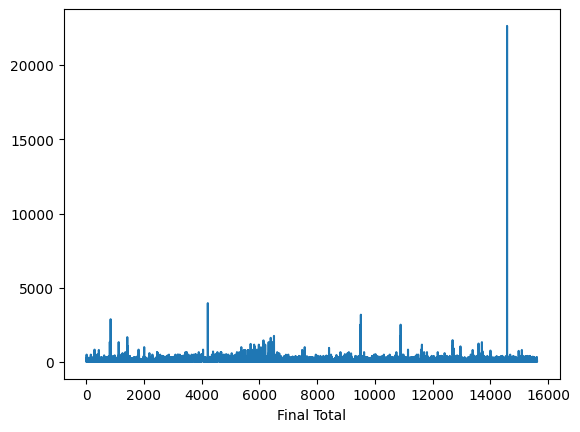

In [61]:
x = data['Final_Total']
plt.plot(x)
plt.xlabel('Final Total')

Text(0, 0.5, 'Invoice No')

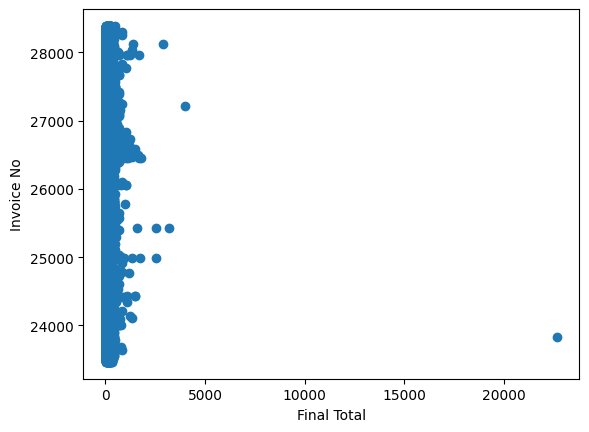

In [62]:
x = data['Final_Total']
y = data['Invoice No']
plt.scatter(x,y)
plt.xlabel('Final Total')
plt.ylabel('Invoice No')

Text(0, 0.5, 'Quantity')

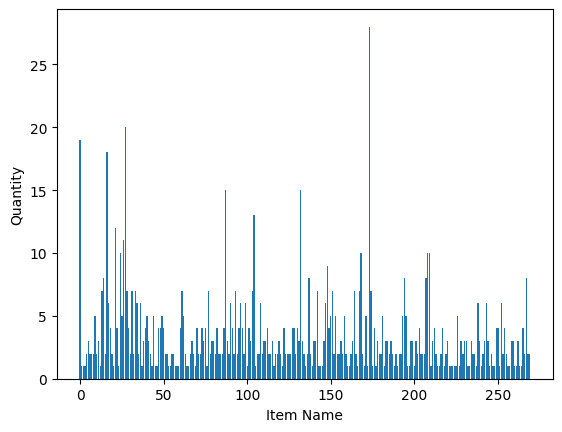

In [19]:
x =data['Item Name']
y =data['Quantity']
plt.bar(x,y)
plt.xlabel("Item Name")
plt.ylabel("Quantity")


Text(0.5, 0, 'Discount')

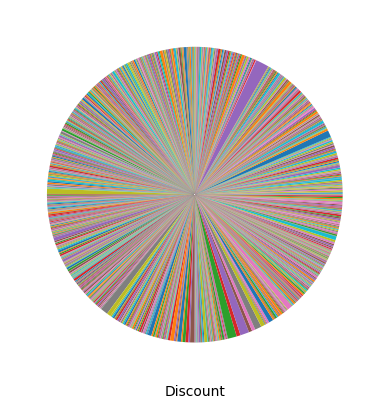

In [63]:
y = data['Discount']
plt.pie(y)
plt.xlabel('Discount')

Text(0.5, 0, 'Final Total')

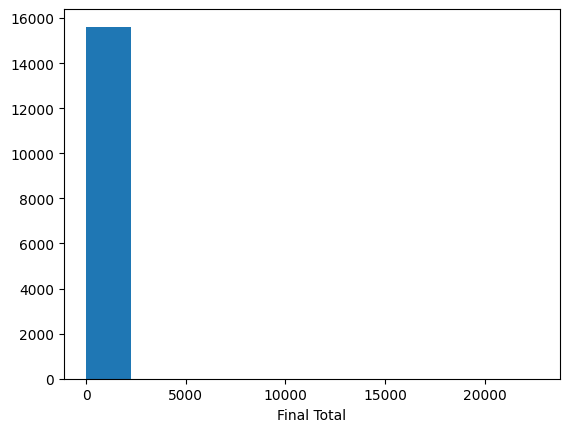

In [64]:
x = data['Final_Total']
plt.hist(x)
plt.xlabel('Final Total')

In [22]:
import seaborn as sns

[Text(0.5, 0, 'Category')]

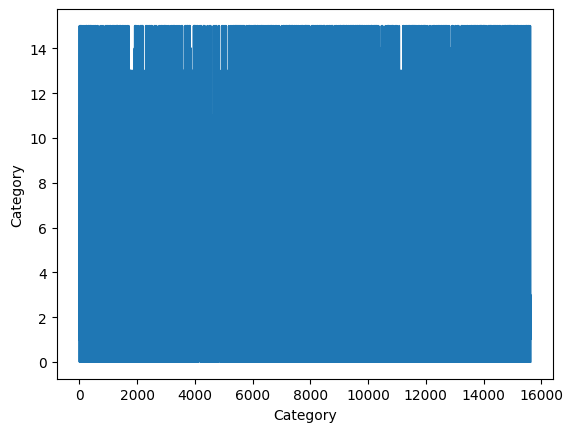

In [68]:
x =data['Category']
q= sns.lineplot(x)
q.set(xlabel = "Category")


[Text(0.5, 0, 'Final Total')]

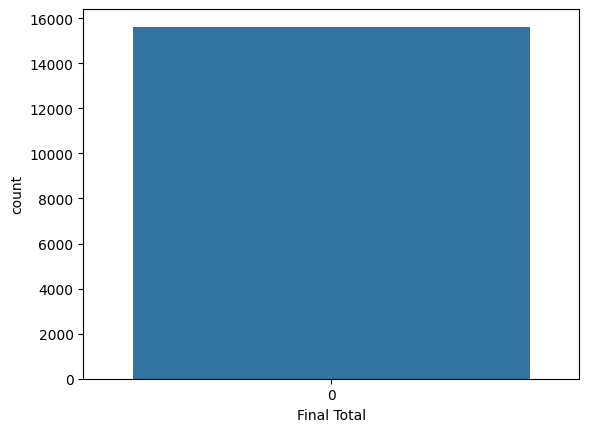

In [24]:
x =data['Final Total']
q = sns.countplot(x)
q.set(xlabel = "Final Total")

<Axes: xlabel='Final Total', ylabel='Invoice No'>

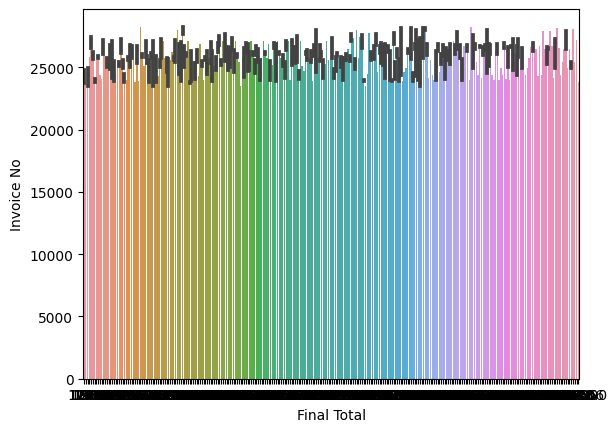

In [25]:
sns.barplot(x=data["Final Total"],y = data['Invoice No'])

<Axes: xlabel='Final Total', ylabel='Invoice No'>

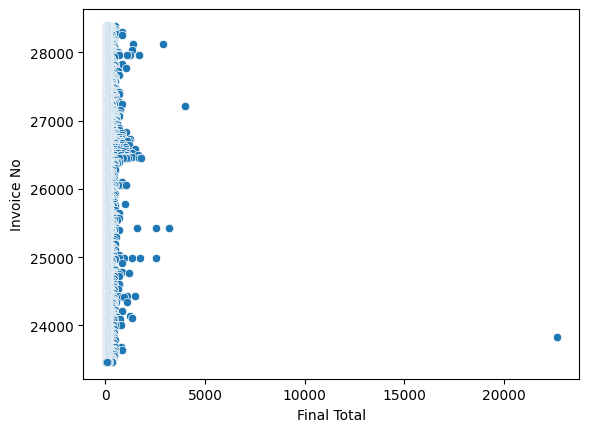

In [27]:
sns.scatterplot(x=data['Final Total'], y=data['Invoice No'])

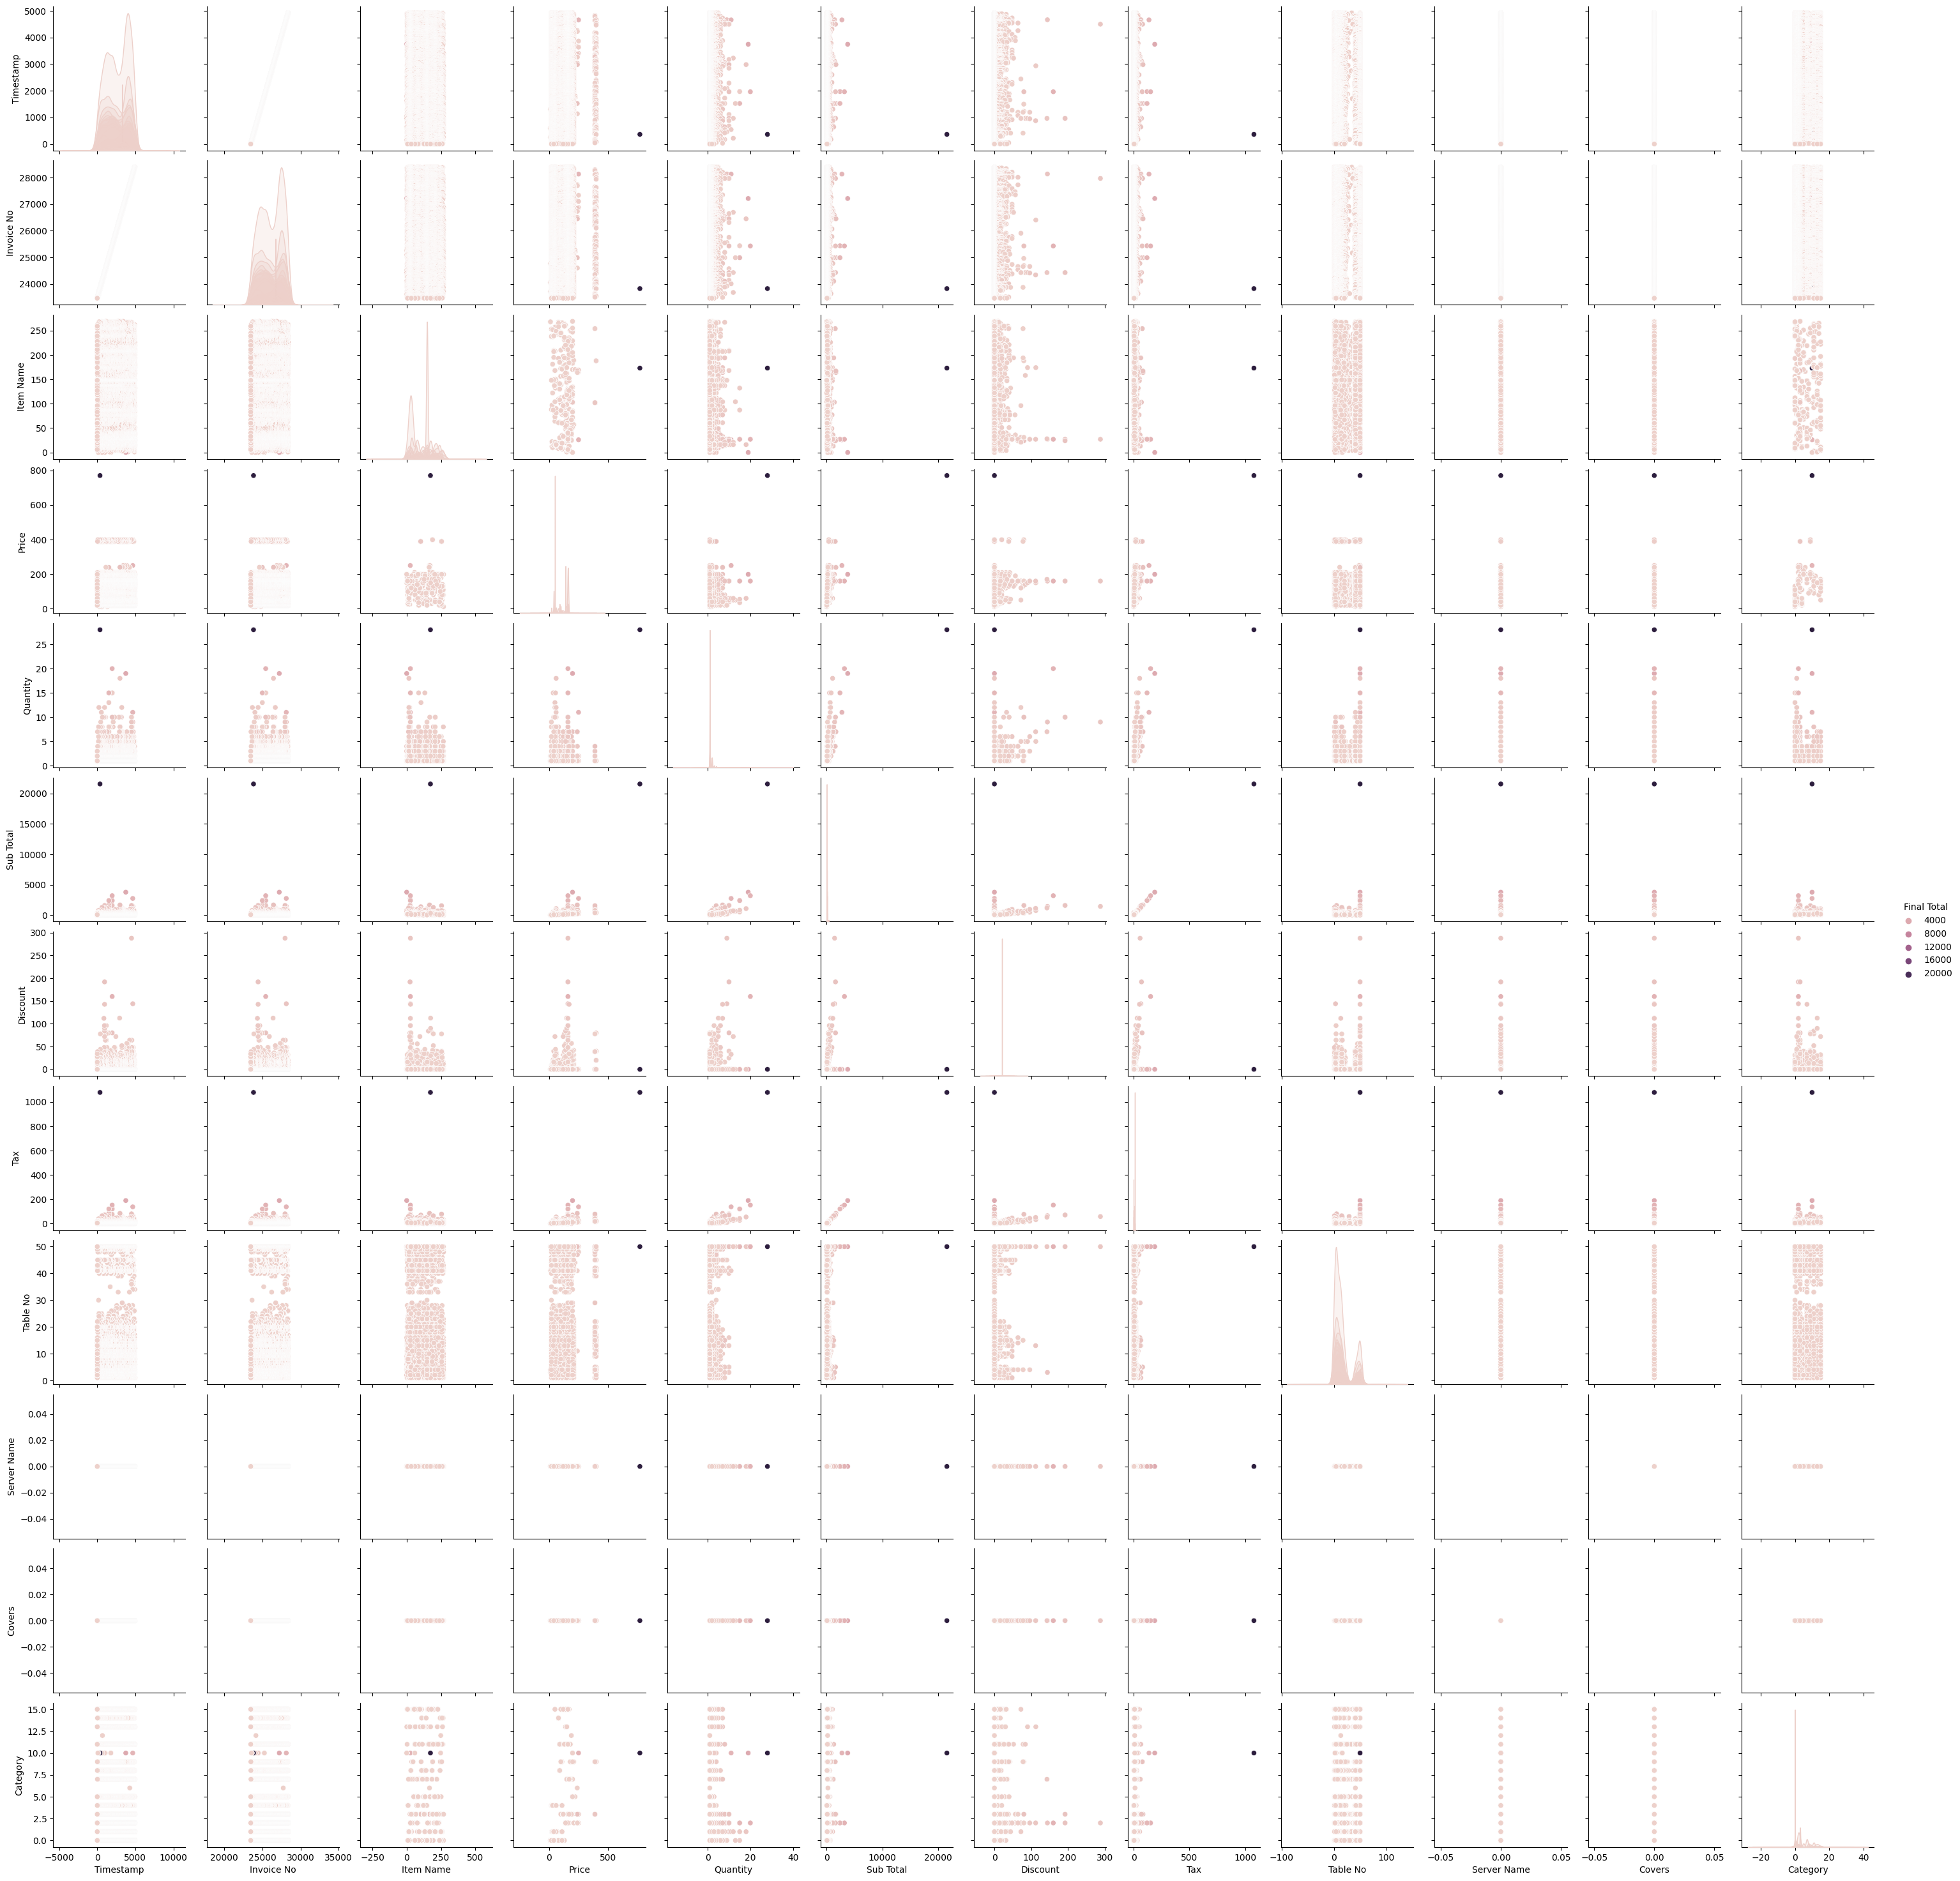

In [29]:
sns.pairplot(data, hue='Final Total')

<ipython-input-69-2457cc3b1636>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['Final_Total'])


<Axes: ylabel='Density'>

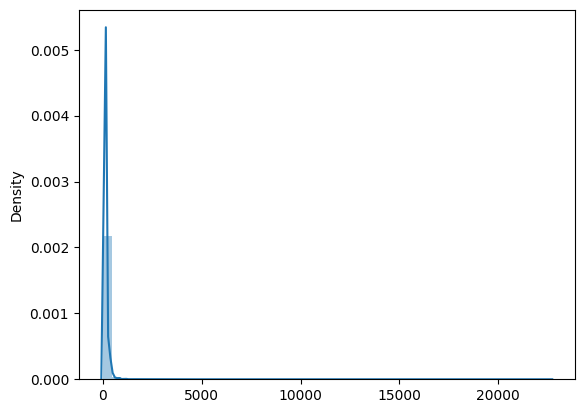

In [69]:
sns.distplot(x=data['Final_Total'])

<Axes: xlabel='Final Total'>

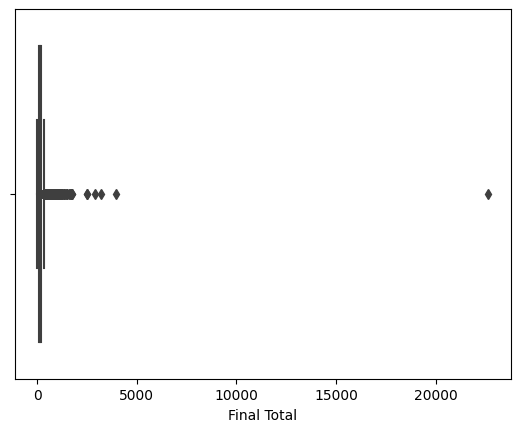

In [32]:
sns.boxplot(x=data['Final Total'])

In [35]:
x = data['Quantity'].sum()
print(x)

20914.0


<Axes: xlabel='Date'>

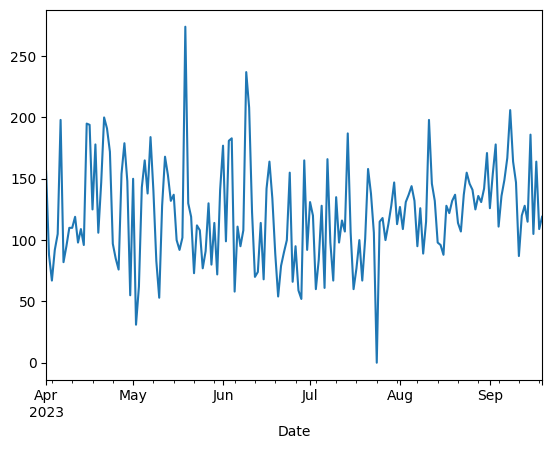

In [34]:
data.set_index('Date').Quantity.resample('D').sum().plot()

<Axes: xlabel='Date'>

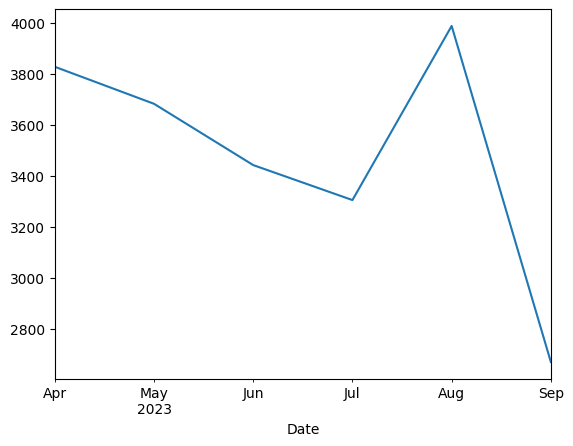

In [36]:
data.set_index('Date').Quantity.resample('M').sum().plot()

In [37]:
data = data.rename(columns={'Final Total':'Final_Total'})

<Axes: xlabel='Date'>

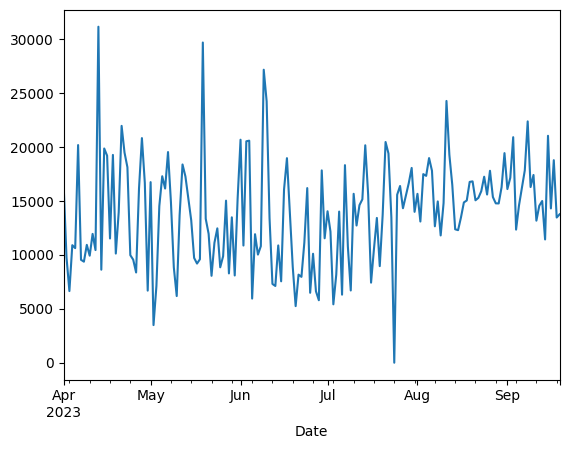

In [38]:
data.set_index('Date').Final_Total.resample('D').sum().plot()

<Axes: xlabel='Date'>

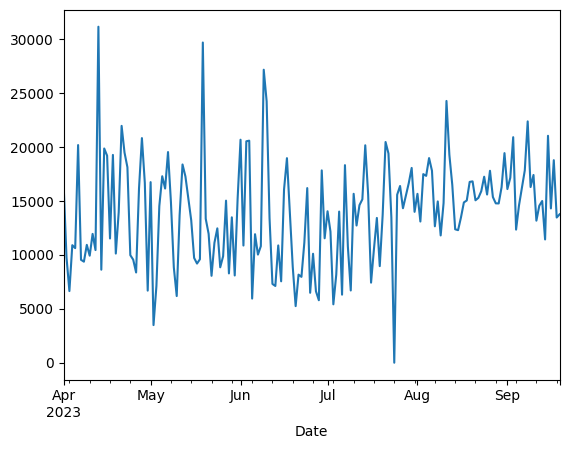

In [40]:
data.set_index('Date').Final_Total.resample('D').sum().plot()

In [39]:
x = data.groupby(['Final_Total']).sum()
print(x)

             Timestamp  Invoice No  Item Name  Price  Quantity  Sub Total  \
Final_Total                                                                 
12.60             2141       72536        804   36.0       3.0       36.0   
16.80              408       23873        238   20.0       1.0       20.0   
17.86             1520       48450        296   40.0       2.0       40.0   
18.80             2392       25857        148   20.0       1.0       20.0   
18.90           109262      836677       4798  620.0      31.0      620.0   
...                ...         ...        ...    ...       ...        ...   
2520.00           3491       50421         54  320.0      30.0     4800.0   
2887.50           4661       28126         26  250.0      11.0     2750.0   
3192.00           1962       25427         27  160.0      20.0     3200.0   
3970.06           3745       27210          0  199.0      19.0     3781.0   
22638.00           362       23827        173  770.0      28.0    21560.0   

<ipython-input-39-2f78a0d55871>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = data.groupby(['Final_Total']).sum()


In [ ]:
x = data.groupby(["Invoice No"]).agg({'Quantity': lambda x : x.sum()})
print(x)

In [42]:
x = data.groupby(["Invoice No"]).agg({'Quantity': lambda x: x.sum(),
                                       'Final_Total': lambda x : x.mean()})
print(x)

            Quantity  Final_Total
Invoice No                       
23465           11.0   162.000000
23466            5.0   110.250000
23467            5.0   193.720000
23468            2.0   273.000000
23469            5.0   115.500000
...              ...          ...
28385            6.0    98.700000
28386           14.0   211.348571
28387            9.0   250.250000
28388           11.0   192.882000
28389           10.0   111.126667

[4925 rows x 2 columns]


<ipython-input-43-cafa6f66758b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trending_items = data.groupby('Item Name').sum().sort_values('Quantity',ascending = False)[['Quantity']][0:25]


<Axes: xlabel='Quantity', ylabel='Item Name'>

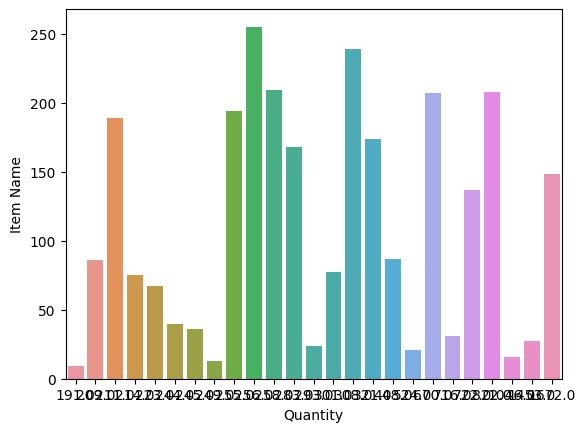

In [43]:
trending_items = data.groupby('Item Name').sum().sort_values('Quantity',ascending = False)[['Quantity']][0:25]
sns.barplot(x = 'Quantity', y = trending_items.index,data=trending_items)


<ipython-input-44-fd681f5477fb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Trending_Items = data.groupby('Item Name').sum().sort_values('Final_Total', ascending = False)[['Final_Total']][0:25]


<Axes: xlabel='Final_Total', ylabel='Item Name'>

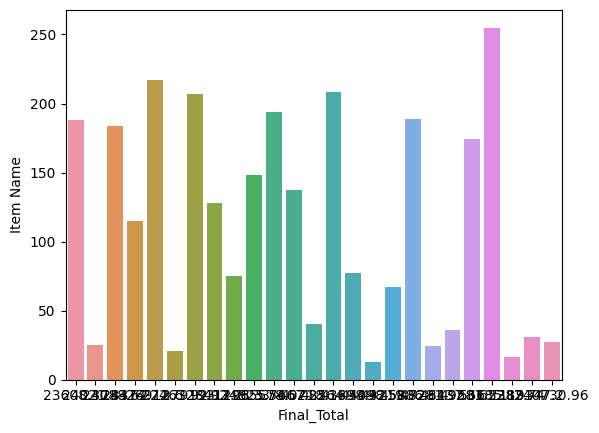

In [44]:
Trending_Items = data.groupby('Item Name').sum().sort_values('Final_Total', ascending = False)[['Final_Total']][0:25]

sns.barplot(x = 'Final_Total', y = Trending_Items.index,data = Trending_Items )

<ipython-input-45-27bbad3b6e97>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trend = data.groupby('Item Name').sum().sort_values('Quantity', ascending = False)[['Quantity', 'Final_Total', 'Price']][0:25]


<Axes: xlabel='Final_Total', ylabel='Item Name'>

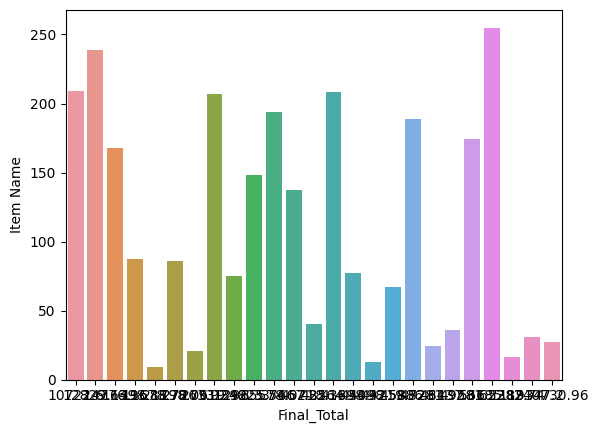

In [45]:
trend = data.groupby('Item Name').sum().sort_values('Quantity', ascending = False)[['Quantity', 'Final_Total', 'Price']][0:25]
sns.barplot(x = 'Final_Total',y = trend.index, data = trend)


<ipython-input-46-0f381e6d8e79>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trend = data.groupby('Category').sum().sort_values('Final_Total',ascending=False)[['Final_Total']][0:25]


<Axes: xlabel='Final_Total', ylabel='Category'>

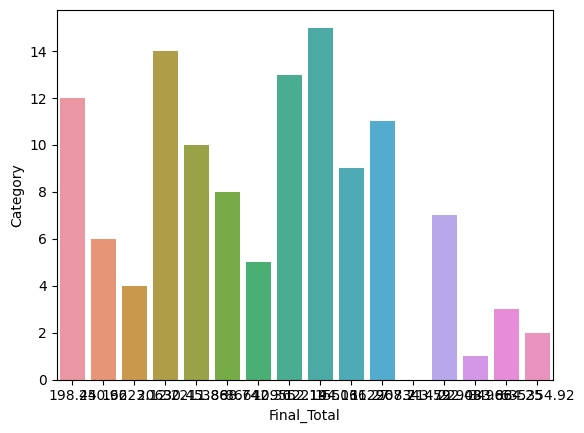

In [46]:
trend = data.groupby('Category').sum().sort_values('Final_Total',ascending=False)[['Final_Total']][0:25]
sns.barplot(x = 'Final_Total',y = trend.index, data = trend)

<Axes: xlabel='Final_Total', ylabel='Date'>

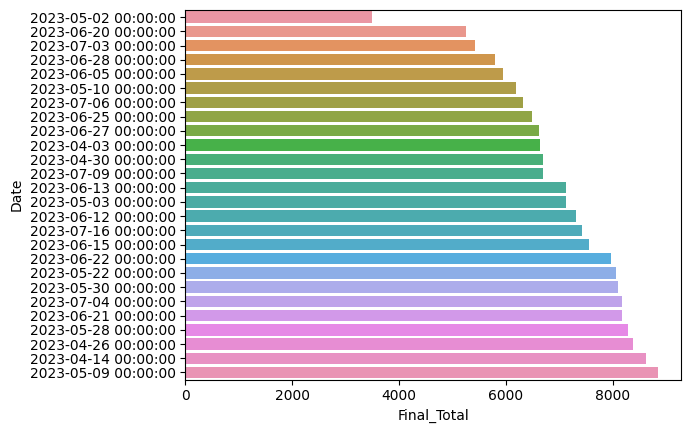

In [47]:
trend = data.groupby('Date').sum().sort_values('Final_Total', ascending = True)[['Final_Total']][0:26]
sns.barplot(x = 'Final_Total', y = trend.index, data = trend)

<Axes: xlabel='Date', ylabel='Final_Total'>

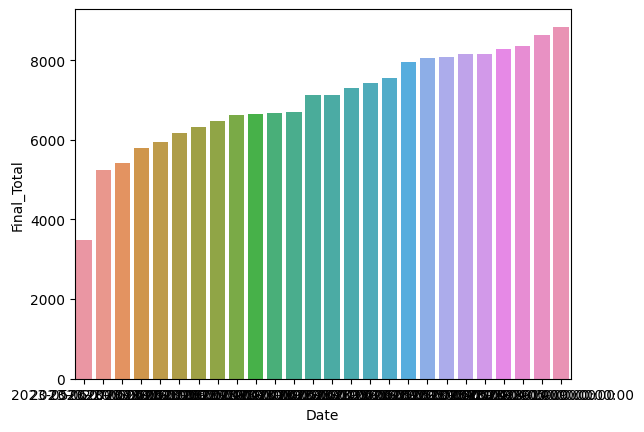

In [48]:
trend = data.groupby('Date').sum().sort_values('Final_Total', ascending = True)[['Final_Total']][0:26]
sns.barplot(y = 'Final_Total', x = trend.index, data = trend)

#just x and y  variable changing that plot also changed.



In [49]:
data.shape

(15621, 14)

<ipython-input-50-198ac22e8d21>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True)


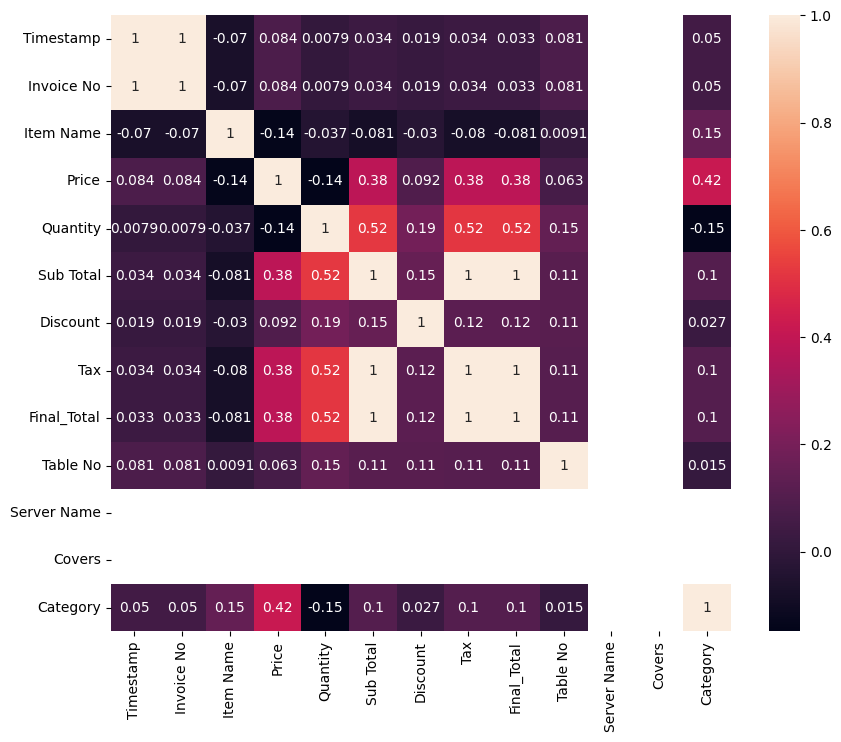

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot = True)
plt.show()

In [51]:
 corr_data = data.corr()
 print(x)
corr_data.abs().unstack().sort_values(ascending=False)[0:10:5]

            Quantity  Final_Total
Invoice No                       
23465           11.0   162.000000
23466            5.0   110.250000
23467            5.0   193.720000
23468            2.0   273.000000
23469            5.0   115.500000
...              ...          ...
28385            6.0    98.700000
28386           14.0   211.348571
28387            9.0   250.250000
28388           11.0   192.882000
28389           10.0   111.126667

[4925 rows x 2 columns]


<ipython-input-51-37d3c0361fa6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = data.corr()


Invoice No  Timestamp    1.0
Tax         Tax          1.0
dtype: float64